In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Insidious/insidious-chart_data-volume-days-pageTypes.csv")

In [4]:
df

,days,07/07/23,07/08/23,07/09/23,07/10/23,07/11/23,07/12/23,07/13/2023,07/14/2023,07/15/2023,...,09/05/23,09/06/23,09/07/23,09/08/23,09/09/23,09/10/23,09/11/23,09/12/23,09/13/2023,09/14/2023
0,Online News,226,212,686,313,70,116,71,57,55,...,5,10,6,8,12,11,8,6,15,13
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,1,2,2,1,1,0,1,0,2,...,0,0,10,0,0,0,0,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,9,13,28,14,17,16,8,24,16,...,18,29,11,13,21,14,25,25,16,6
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,22,9,12,19,8,5,6,7,4,...,1,2,0,0,1,3,1,1,0,1


In [5]:
engagement = df.copy()

In [6]:
#Transpose Matrix
engagement = engagement.transpose()

In [7]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [8]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [9]:
engagement

,total
date,
2023-07-07,473
2023-07-08,381
2023-07-09,923
2023-07-10,520
2023-07-11,197
...,...
2023-09-10,41
2023-09-11,55
2023-09-12,44


In [10]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Insidious/insidious-bo.csv")

In [11]:
bo = bo.dropna(axis=1)

In [12]:
bo

,date,revenue,to_date
0,07/07/2023,"$15,203,849","$15,203,849"
1,07/08/2023,"$10,071,050","$25,274,899"
2,07/09/2023,"$7,738,137","$33,013,036"
3,07/10/2023,"$3,507,174","$36,520,210"
4,07/11/2023,"$3,486,701","$40,006,911"
...,...,...,...
65,09/10/2023,"$3,051","$82,152,860"
66,09/11/2023,"$1,155","$82,154,015"
67,09/12/2023,"$1,064","$82,155,079"
68,09/13/2023,"$1,234","$82,156,313"


In [13]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [14]:
bo

,revenue,to_date
date,,
07/07/2023,15203849,"$15,203,849"
07/08/2023,10071050,"$25,274,899"
07/09/2023,7738137,"$33,013,036"
07/10/2023,3507174,"$36,520,210"
07/11/2023,3486701,"$40,006,911"
...,...,...
09/10/2023,3051,"$82,152,860"
09/11/2023,1155,"$82,154,015"
09/12/2023,1064,"$82,155,079"


In [15]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [16]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [17]:
engagement_ts

,total
date,
2023-07-07,473
2023-07-08,381
2023-07-09,923
2023-07-10,520
2023-07-11,197
...,...
2023-09-10,41
2023-09-11,55
2023-09-12,44


In [18]:
bo_ts

,revenue,to_date
date,,
07/07/2023,15203849,"$15,203,849"
07/08/2023,10071050,"$25,274,899"
07/09/2023,7738137,"$33,013,036"
07/10/2023,3507174,"$36,520,210"
07/11/2023,3486701,"$40,006,911"
...,...,...
09/10/2023,3051,"$82,152,860"
09/11/2023,1155,"$82,154,015"
09/12/2023,1064,"$82,155,079"


In [19]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [20]:
combined_df

,total,revenue
date,,
2023-07-07,473,15203849
2023-07-08,381,10071050
2023-07-09,923,7738137
2023-07-10,520,3507174
2023-07-11,197,3486701
...,...,...
2023-09-10,41,3051
2023-09-11,55,1155
2023-09-12,44,1064


In [21]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [22]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -4.457486
p-value: 0.000235
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
ADF Statistic: -1.748128
p-value: 0.406502
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


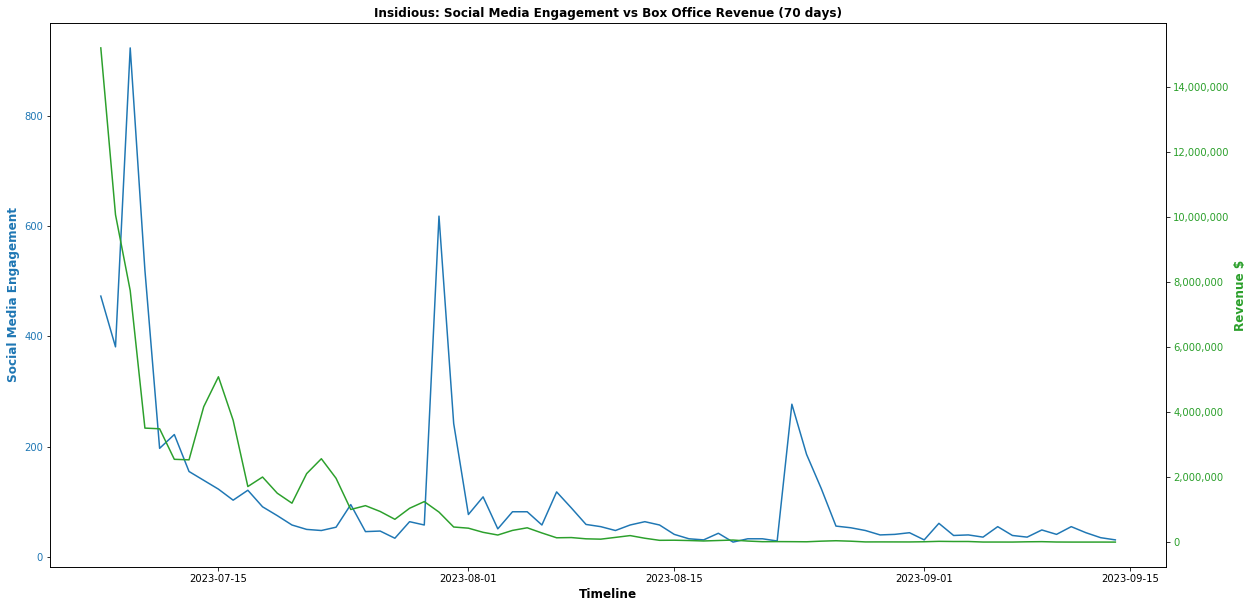

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Insidious: Social Media Engagement vs Box Office Revenue (70 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [24]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [25]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.6375397440224152


Maximum Pearson correlation coefficient: 0.7643078446584917
Lag associated with Maximum Pearson correlation coefficient: 2


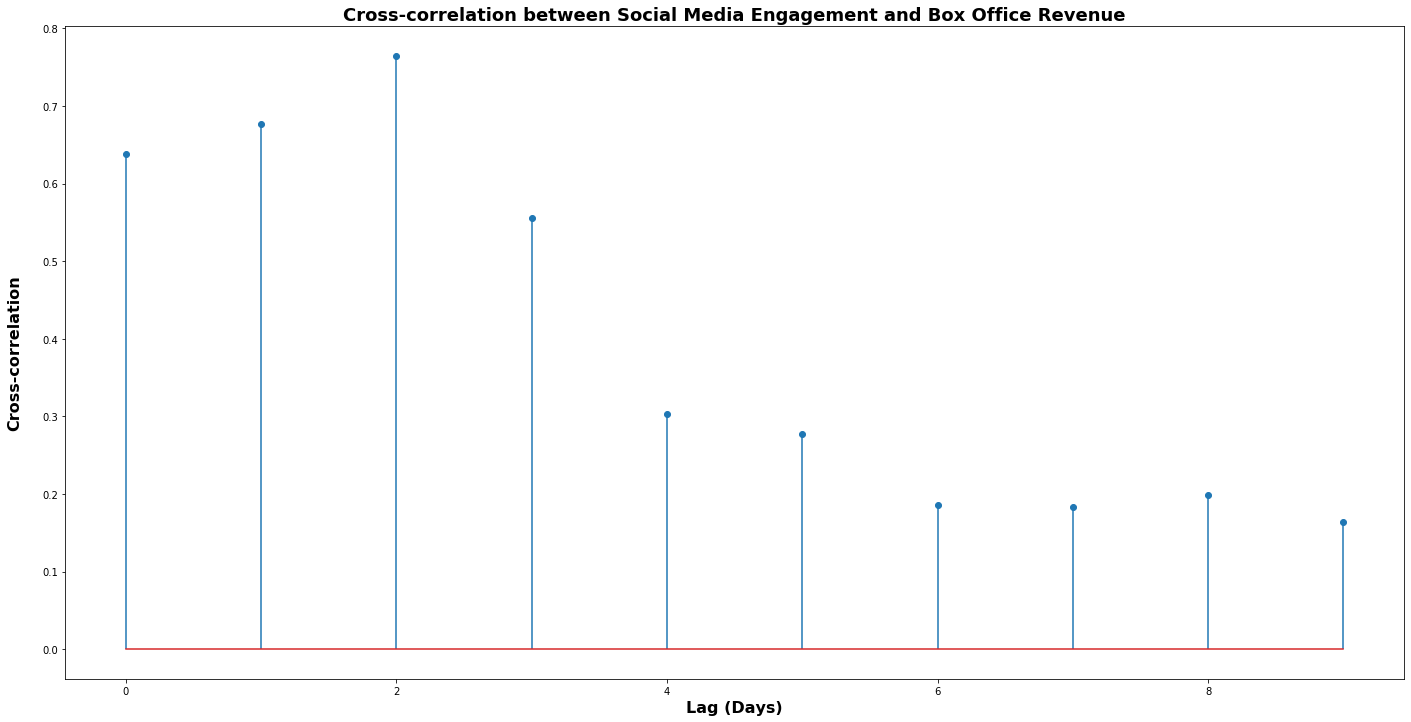

In [26]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 10)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.7029 , p=0.0001  , df_denom=66, df_num=1
ssr based chi2 test:   chi2=19.5530 , p=0.0000  , df=1
likelihood ratio test: chi2=17.2152 , p=0.0000  , df=1
parameter F test:         F=18.7029 , p=0.0001  , df_denom=66, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.9063 , p=0.0000  , df_denom=63, df_num=2
ssr based chi2 test:   chi2=42.9724 , p=0.0000  , df=2
likelihood ratio test: chi2=33.3046 , p=0.0000  , df=2
parameter F test:         F=19.9063 , p=0.0000  , df_denom=63, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9809  , p=0.4079  , df_denom=60, df_num=3
ssr based chi2 test:   chi2=3.2861  , p=0.3496  , df=3
likelihood ratio test: chi2=3.2080  , p=0.3607  , df=3
parameter F test:         F=0.9809  , p=0.4079  , df_denom=60, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5299  , p=0.7142  , df_d

In [28]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,Twitter,VK,Review,Reddit,4Chan,LexisNexis Licensed News
07/07/23,226,0,1,0,0,0,9,0,0,22,6,1,152,0,2,54,0,0
07/08/23,212,0,2,0,0,0,13,0,0,9,23,2,77,0,0,43,0,0
07/09/23,686,0,2,0,0,0,28,0,0,12,26,6,108,0,2,53,0,0
07/10/23,313,0,1,0,0,0,14,0,0,19,22,3,110,0,0,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/10/23,11,0,0,0,0,0,14,0,0,3,2,0,8,0,1,2,0,0
09/11/23,8,0,0,0,0,0,25,0,0,1,1,0,18,0,0,2,0,0
09/12/23,6,0,0,0,0,0,25,0,0,1,1,1,7,0,0,3,0,0
09/13/2023,15,0,0,0,0,0,16,0,0,0,0,0,2,0,0,2,0,0


In [29]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [30]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [31]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [32]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [33]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,Twitter,Review,Reddit
07/07/23,226,1,0,9,22,6,1,152,2,54
07/08/23,212,2,0,13,9,23,2,77,0,43
07/09/23,686,2,0,28,12,26,6,108,2,53
07/10/23,313,1,0,14,19,22,3,110,0,38
07/11/23,70,1,0,17,8,8,0,41,0,52
...,...,...,...,...,...,...,...,...,...,...
09/10/23,11,0,0,14,3,2,0,8,1,2
09/11/23,8,0,0,25,1,1,0,18,0,2
09/12/23,6,0,0,25,1,1,1,7,0,3
09/13/2023,15,0,0,16,0,0,0,2,0,2


In [34]:
shift = -2 #Based on Lag

In [35]:
bo_series = bo['revenue']

In [36]:
bo_series

date
07/07/2023    15203849
07/08/2023    10071050
07/09/2023     7738137
07/10/2023     3507174
07/11/2023     3486701
                ...   
09/10/2023        3051
09/11/2023        1155
09/12/2023        1064
09/13/2023        1234
09/14/2023         649
Name: revenue, Length: 70, dtype: int64

In [37]:
bo_series_shifted = bo_series.shift(shift)

In [38]:
bo_series_shifted = bo_series_shifted[:shift]

In [39]:
bo_series_shifted

date
07/07/2023    7738137.0
07/08/2023    3507174.0
07/09/2023    3486701.0
07/10/2023    2547367.0
07/11/2023    2531276.0
                ...    
09/08/2023       3051.0
09/09/2023       1155.0
09/10/2023       1064.0
09/11/2023       1234.0
09/12/2023        649.0
Name: revenue, Length: 68, dtype: float64

In [40]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [41]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,Twitter,Review,Reddit
07/07/23,226,1,0,9,22,6,1,152,2,54
07/08/23,212,2,0,13,9,23,2,77,0,43
07/09/23,686,2,0,28,12,26,6,108,2,53
07/10/23,313,1,0,14,19,22,3,110,0,38
07/11/23,70,1,0,17,8,8,0,41,0,52
...,...,...,...,...,...,...,...,...,...,...
09/08/23,8,0,0,13,0,1,0,12,0,2
09/09/23,12,0,0,21,1,2,0,6,0,7
09/10/23,11,0,0,14,3,2,0,8,1,2
09/11/23,8,0,0,25,1,1,0,18,0,2


In [42]:
reg_engagement = reg_engagement.astype(int)

In [43]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,Twitter,Review,Reddit
07/07/23,226,1,0,9,22,6,1,152,2,54
07/08/23,212,2,0,13,9,23,2,77,0,43
07/09/23,686,2,0,28,12,26,6,108,2,53
07/10/23,313,1,0,14,19,22,3,110,0,38
07/11/23,70,1,0,17,8,8,0,41,0,52
...,...,...,...,...,...,...,...,...,...,...
09/08/23,8,0,0,13,0,1,0,12,0,2
09/09/23,12,0,0,21,1,2,0,6,0,7
09/10/23,11,0,0,14,3,2,0,8,1,2
09/11/23,8,0,0,25,1,1,0,18,0,2


In [44]:
bo_series_shifted

date
07/07/2023    7738137.0
07/08/2023    3507174.0
07/09/2023    3486701.0
07/10/2023    2547367.0
07/11/2023    2531276.0
                ...    
09/08/2023       3051.0
09/09/2023       1155.0
09/10/2023       1064.0
09/11/2023       1234.0
09/12/2023        649.0
Name: revenue, Length: 68, dtype: float64

In [45]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series_shifted  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.11e-12
Time:                        20:14:27   Log-Likelihood:                -1018.6
No. Observations:                  68   AIC:                             2059.
Df Residuals:                      57   BIC:                             2084.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.367e+05   1.03e+05     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Blogs              550980.407880
Reddit             462925.741302
Twitter            383106.035416
Online News        195345.080225
Facebook Public    113817.974144
Forums             100178.301775
Tumblr              84455.126580
Review              60900.411619
Facebook            48975.951259
YouTube              3628.359974
dtype: float64
